In [1]:
# Importing required packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVR

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

from keras.layers import RNN
from keras.layers import LSTM
import datetime

Using TensorFlow backend.


In [2]:
#reading information from train.cv
PATH= '/Users/rituka/Downloads/WindEnergyForecasting-Assignment2/'
file_name= 'TrainData.csv' 
train_data = pd.read_csv(PATH + file_name)

In [3]:
#Assignment 2, Part 3
train_data_3= train_data[['TIMESTAMP', 'POWER']]

In [4]:
#Converting timestamps to date data and put the dates as indices of the dataframe
import datetime
dateTimeFormat = "%Y%m%d %H:%M"

dateparse_temp= lambda x: datetime.datetime.strptime(x, dateTimeFormat)
train_data_3['TIMESTAMP'] = pd.to_datetime(train_data_3['TIMESTAMP'].apply(dateparse_temp))
train_data_3.set_index('TIMESTAMP',inplace= True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
train_data_3.head()

,POWER
TIMESTAMP,
2012-01-01 01:00:00,0.273678
2012-01-01 02:00:00,0.086796
2012-01-01 03:00:00,0.006811
2012-01-01 04:00:00,0.018646
2012-01-01 05:00:00,0.034812


Text(0.5,0,'Date')

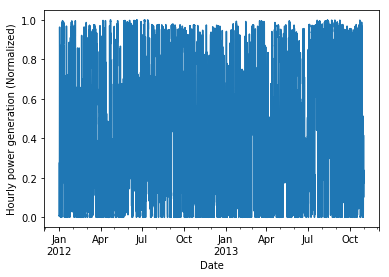

In [8]:
train_data_3['POWER'].plot()

plt.ylabel('Hourly power generation (Normalized)')
plt.xlabel('Date')

In [5]:
#creating testset
test_name_power='Solution.csv'
test_data_power=pd.read_csv(PATH + test_name_power)
test_data_power['TIMESTAMP'] = pd.to_datetime(test_data_power['TIMESTAMP'].apply(dateparse_temp))
test_data_power.set_index('TIMESTAMP',inplace= True)

In [6]:
test_data_3= test_data_power

Text(0.5,0,'Date')

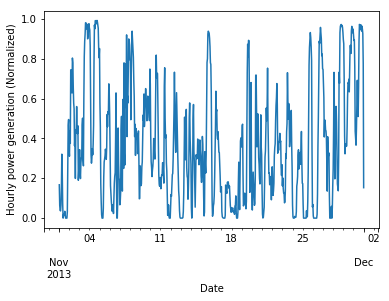

In [7]:
test_data_3['POWER'].plot()

plt.ylabel('Hourly power generation (Normalized)')
plt.xlabel('Date')

In [8]:
#This function creates lag values of a specific feature(here power generation) according to the number of look_back

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [9]:
#We create a dataset(time series data with 1 lag) for train
X_train,y_train= create_dataset(train_data_3.values, 1)

In [10]:
X_train.shape

(16078, 1)

In [11]:
y_train.shape

(16078,)

In [12]:
#We create a dataset(time series data with 1 lag) for test
X_test,y_test= create_dataset(test_data_3.values,1)

In [13]:
X_test.shape

(718, 1)

In [14]:
y_test.shape

(718,)

In [ ]:
#multiple linear regression


In [15]:
#linear regression

LR_model=LinearRegression()
LR_model.fit(X_train,y_train)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
#test the model
predictions_lr= LR_model.predict(X_test)

In [17]:
#Calculating RMSE
def print_scores(y_test,y_pred, model):
    rmse= np.sqrt(mean_squared_error(y_test,y_pred))    
    print(" Root Mean squared error for %s is %.4f"% (model,rmse))
    return rmse

In [18]:
rmse_LR=print_scores(y_test,predictions_lr, 'Linear Regression')

 Root Mean squared error for Linear Regression is 0.1241


In [ ]:
fig= plt.figure(figsize=(15,8))
power_changes=fig.add_subplot(1,1,1)
power_changes.set_ylabel('Generated power')
power_changes.set_xlabel('Hours')

power_changes.plot(y_test, color='blue', label='Real power')
power_changes.plot(predictions_lr, color= 'red', label='Predictions')
power_changes.set_title('Real wind power versus predictions by Multiple Linear Regression using timeseries data ')
power_changes.legend(loc='best')

In [20]:
#SVR
#Support Vector Regression

# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf.fit(X_train,y_train)



SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [22]:
y_svr_rbf = svr_rbf.predict(X_test)



In [23]:
print_scores(y_test,y_svr_rbf, 'SVR')

 Root Mean squared error for SVR is 0.1254


0.1254009937070675

In [ ]:
fig= plt.figure(figsize=(15,8))
power_changes=fig.add_subplot(1,1,1)
power_changes.set_ylabel('Generated power')
power_changes.set_xlabel('Sample number')

power_changes.plot(y_test, color='blue', label='Real power')
power_changes.plot(y_svr_rbf, color= 'red', label='Predictions')
power_changes.set_title('Real wind power versus predictions by SVR using timeseries data ')
power_changes.legend(loc='best')

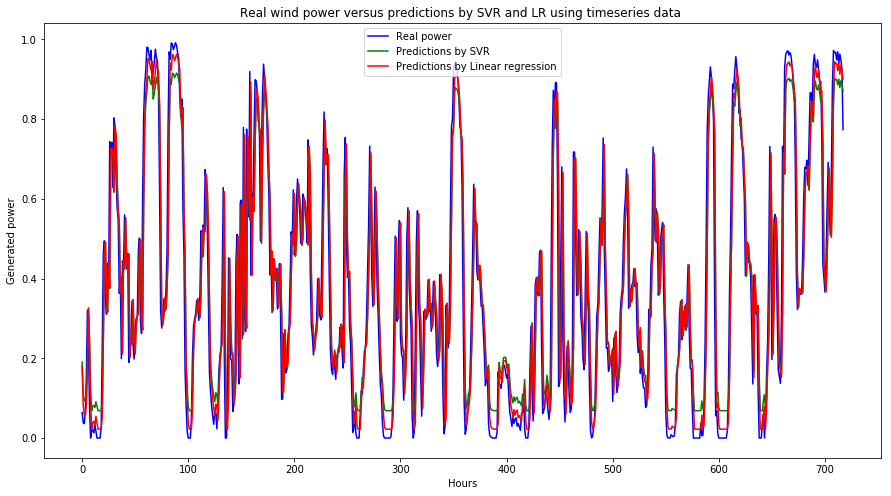

In [24]:
#Comparison 1-part 3
fig= plt.figure(figsize=(15,8))
power_changes=fig.add_subplot(1,1,1)
power_changes.set_ylabel('Generated power')
power_changes.set_xlabel('Hours')

power_changes.plot(y_test, color='blue', label='Real power')
power_changes.plot(y_svr_rbf, color= 'green', label='Predictions by SVR')
power_changes.plot(predictions_lr, color= 'red', label='Predictions by Linear regression')
power_changes.set_title('Real wind power versus predictions by SVR and LR using timeseries data ')
power_changes.legend(loc='best')

In [25]:
#scaling the features to be used in ANN and RNN(lstm)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)



In [26]:
#ANN
# fix random seed for reproducibility
np.random.seed(30)
#number of neurons in hidden layer 1=10

def create_model(num_neurons_1,X, y):
    model_ann = Sequential()
    #To define number of input variables and the hidden layer
    model_ann.add(Dense(num_neurons_1, input_dim= X.shape[1], activation='relu'))
    #To add another layer
    #model_ann.add(Dense(20, kernel_initializer='normal', activation='relu'))
    
    #To create output layer
    model_ann.add(Dense(1, kernel_initializer='normal'))
    model_ann.compile(loss='mean_squared_error', optimizer='adam')
    #To fit the model on the training set
    model_ann.fit(X, y, epochs=70, batch_size=50, verbose=2)
    
    return model_ann
  
#number of neurons in the hidden layer
num_neurons_1= 10
model_ann=create_model(num_neurons_1,X_train_scaled, y_train)

Epoch 1/70
 - 1s - loss: 0.0883
Epoch 2/70
 - 0s - loss: 0.0156
Epoch 3/70
 - 0s - loss: 0.0116
Epoch 4/70
 - 0s - loss: 0.0115
Epoch 5/70
 - 0s - loss: 0.0114
Epoch 6/70
 - 0s - loss: 0.0114
Epoch 7/70
 - 0s - loss: 0.0114
Epoch 8/70
 - 0s - loss: 0.0114
Epoch 9/70
 - 0s - loss: 0.0114
Epoch 10/70
 - 0s - loss: 0.0114
Epoch 11/70
 - 0s - loss: 0.0114
Epoch 12/70
 - 0s - loss: 0.0114
Epoch 13/70
 - 0s - loss: 0.0114
Epoch 14/70
 - 0s - loss: 0.0114
Epoch 15/70
 - 0s - loss: 0.0114
Epoch 16/70
 - 0s - loss: 0.0114
Epoch 17/70
 - 0s - loss: 0.0114
Epoch 18/70
 - 0s - loss: 0.0114
Epoch 19/70
 - 0s - loss: 0.0114
Epoch 20/70
 - 0s - loss: 0.0114
Epoch 21/70
 - 0s - loss: 0.0115
Epoch 22/70
 - 0s - loss: 0.0115
Epoch 23/70
 - 0s - loss: 0.0114
Epoch 24/70
 - 0s - loss: 0.0114
Epoch 25/70
 - 0s - loss: 0.0114
Epoch 26/70
 - 0s - loss: 0.0114
Epoch 27/70
 - 0s - loss: 0.0114
Epoch 28/70
 - 0s - loss: 0.0114
Epoch 29/70
 - 0s - loss: 0.0114
Epoch 30/70
 - 0s - loss: 0.0114
Epoch 31/70
 - 0s -

In [27]:
ann_pred = model_ann.predict(X_test_scaled)

In [28]:
print_scores(y_test,ann_pred, 'ANN')

 Root Mean squared error for ANN is 0.1240


0.12398979501811555

In [ ]:
fig= plt.figure(figsize=(15,8))
power_changes=fig.add_subplot(1,1,1)
power_changes.set_ylabel('Generated power')
power_changes.set_xlabel('Date')

power_changes.plot(y_test, color='blue', label='Real power')
power_changes.plot(ann_pred, color= 'red', label='Predictions')
power_changes.set_title('Real wind power versus predictions by ANN using timeseries data ')
power_changes.legend(loc='best')

In [29]:
#LSTM(A kind of RNN with Long-short term memory cells)
# reshape input to be [samples, time steps, features]
trainX_re= np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
testX_re = np.reshape(X_test_scaled, (X_test_scaled.shape[0],X_test_scaled.shape[1], 1))




In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.layers import RNN
from keras.layers import GRU

In [53]:
np.random.seed(7)


def fit_lstm(X, Y ):
    batch_size= 50
    look_back= 1
    
    model = Sequential()
    
    model.add(LSTM(30, activation='relu', input_shape=(look_back,1 ) ))
    
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam') 
    model.fit(X, Y, epochs= 70, batch_size= batch_size, verbose=2) 
    
    return model

In [54]:
lstm_model=fit_lstm(trainX_re, y_train)

Epoch 1/70
 - 2s - loss: 0.0946
Epoch 2/70
 - 1s - loss: 0.0177
Epoch 3/70
 - 1s - loss: 0.0120
Epoch 4/70
 - 1s - loss: 0.0119
Epoch 5/70
 - 1s - loss: 0.0118
Epoch 6/70
 - 1s - loss: 0.0118
Epoch 7/70
 - 1s - loss: 0.0117
Epoch 8/70
 - 1s - loss: 0.0117
Epoch 9/70
 - 1s - loss: 0.0116
Epoch 10/70
 - 1s - loss: 0.0116
Epoch 11/70
 - 1s - loss: 0.0116
Epoch 12/70
 - 1s - loss: 0.0115
Epoch 13/70
 - 1s - loss: 0.0115
Epoch 14/70
 - 1s - loss: 0.0115
Epoch 15/70
 - 1s - loss: 0.0115
Epoch 16/70
 - 1s - loss: 0.0115
Epoch 17/70
 - 1s - loss: 0.0115
Epoch 18/70
 - 1s - loss: 0.0114
Epoch 19/70
 - 1s - loss: 0.0114
Epoch 20/70
 - 1s - loss: 0.0114
Epoch 21/70
 - 1s - loss: 0.0114
Epoch 22/70
 - 1s - loss: 0.0115
Epoch 23/70
 - 1s - loss: 0.0114
Epoch 24/70
 - 1s - loss: 0.0114
Epoch 25/70
 - 1s - loss: 0.0114
Epoch 26/70
 - 1s - loss: 0.0114
Epoch 27/70
 - 1s - loss: 0.0114
Epoch 28/70
 - 1s - loss: 0.0114
Epoch 29/70
 - 1s - loss: 0.0114
Epoch 30/70
 - 1s - loss: 0.0114
Epoch 31/70
 - 1s -

In [55]:
lstm_pred = lstm_model.predict(testX_re)

In [56]:
print_scores(y_test,lstm_pred, 'LSTM')

 Root Mean squared error for LSTM is 0.1238


0.12375376741679166

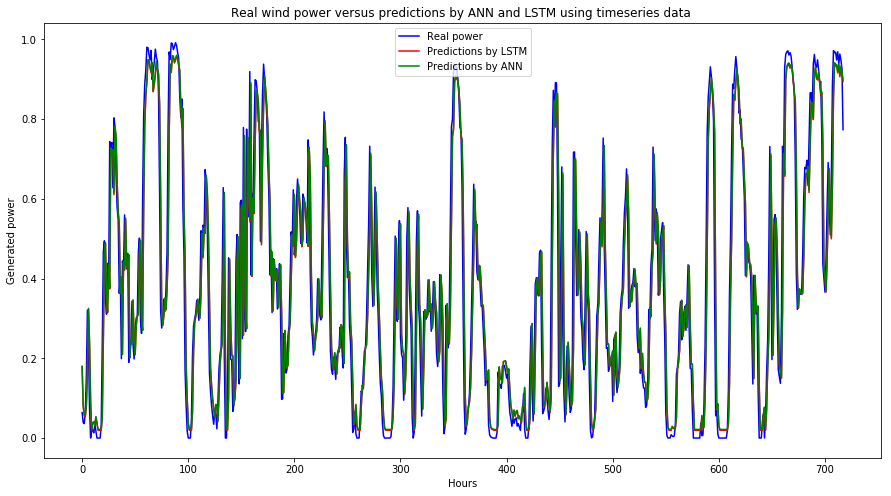

In [57]:
#part 3-comparison 2

fig= plt.figure(figsize=(15,8))
power_changes=fig.add_subplot(1,1,1)
power_changes.set_ylabel('Generated power')
power_changes.set_xlabel('Hours')

power_changes.plot(y_test, color='blue', label='Real power')

power_changes.plot(lstm_pred, color= 'red', label='Predictions by LSTM')
power_changes.plot(ann_pred, color= 'green', label='Predictions by ANN')
power_changes.set_title('Real wind power versus predictions by ANN and LSTM using timeseries data ')
power_changes.legend(loc='best')

In [ ]:
#additional testing
#We can create a dataste with more than one fetaure(lag variable of power consumption) 
#and then test the performanc of the models using new dataset.

In [58]:
#We create a dataset WITH MORE lags(time series data with 24 lags) 

X_test,y_test= create_dataset(test_data_3.values,24)
X_train,y_train= create_dataset(train_data_3.values, 24)

In [59]:
#LR

LR_model=LinearRegression()
LR_model.fit(X_train,y_train)
predictions_lr= LR_model.predict(X_test)
rmse_LR=print_scores(y_test,predictions_lr, 'Linear Regression')

 Root Mean squared error for Linear Regression is 0.1213


In [60]:
#svr
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf.fit(X_train,y_train)
y_svr_rbf = svr_rbf.predict(X_test)

print_scores(y_test,y_svr_rbf, 'SVR')

 Root Mean squared error for SVR is 0.1281


0.12806162975318042

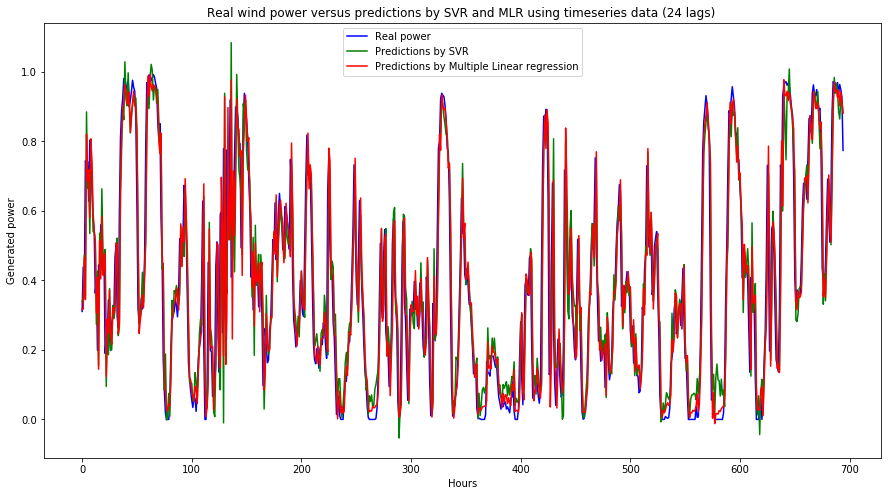

In [62]:
#Comparison 1 with 24 lags-part 3
fig= plt.figure(figsize=(15,8))
power_changes=fig.add_subplot(1,1,1)
power_changes.set_ylabel('Generated power')
power_changes.set_xlabel('Hours')

power_changes.plot(y_test, color='blue', label='Real power')
power_changes.plot(y_svr_rbf, color= 'green', label='Predictions by SVR')
power_changes.plot(predictions_lr, color= 'red', label='Predictions by Multiple Linear regression')
power_changes.set_title('Real wind power versus predictions by SVR and MLR using timeseries data (24 lags) ')
power_changes.legend(loc='best')

In [63]:
#ANN INPUT NODES=24, numbe rof neurons in hidden layer=40
scaler = MinMaxScaler() 
X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)



# fix random seed for reproducibility
np.random.seed(30)
#number of neurons in hidden layer 1=10

def create_model(num_neurons_1,X, y):
    model_ann = Sequential()
    #To define number of input variables and the hidden layer
    model_ann.add(Dense(num_neurons_1, input_dim= X.shape[1], activation='relu'))
    #To add another layer
    #model_ann.add(Dense(20, kernel_initializer='normal', activation='relu'))
    
    #To create output layer
    model_ann.add(Dense(1, kernel_initializer='normal'))
    model_ann.compile(loss='mean_squared_error', optimizer='adam')
    #To fit the model on the training set
    model_ann.fit(X, y, epochs=70, batch_size=50, verbose=2)
    
    return model_ann
  
#number of neurons in the hidden layer
num_neurons_1= 40
model_ann=create_model(num_neurons_1,X_train_scaled, y_train)

Epoch 1/70
 - 1s - loss: 0.0340
Epoch 2/70
 - 0s - loss: 0.0130
Epoch 3/70
 - 0s - loss: 0.0119
Epoch 4/70
 - 0s - loss: 0.0113
Epoch 5/70
 - 0s - loss: 0.0111
Epoch 6/70
 - 0s - loss: 0.0111
Epoch 7/70
 - 0s - loss: 0.0110
Epoch 8/70
 - 0s - loss: 0.0110
Epoch 9/70
 - 0s - loss: 0.0107
Epoch 10/70
 - 0s - loss: 0.0108
Epoch 11/70
 - 0s - loss: 0.0107
Epoch 12/70
 - 0s - loss: 0.0108
Epoch 13/70
 - 0s - loss: 0.0107
Epoch 14/70
 - 0s - loss: 0.0107
Epoch 15/70
 - 0s - loss: 0.0107
Epoch 16/70
 - 0s - loss: 0.0108
Epoch 17/70
 - 0s - loss: 0.0107
Epoch 18/70
 - 0s - loss: 0.0107
Epoch 19/70
 - 0s - loss: 0.0107
Epoch 20/70
 - 0s - loss: 0.0106
Epoch 21/70
 - 0s - loss: 0.0107
Epoch 22/70
 - 0s - loss: 0.0106
Epoch 23/70
 - 0s - loss: 0.0106
Epoch 24/70
 - 0s - loss: 0.0107
Epoch 25/70
 - 0s - loss: 0.0106
Epoch 26/70
 - 0s - loss: 0.0106
Epoch 27/70
 - 0s - loss: 0.0106
Epoch 28/70
 - 0s - loss: 0.0107
Epoch 29/70
 - 0s - loss: 0.0107
Epoch 30/70
 - 0s - loss: 0.0106
Epoch 31/70
 - 0s -

In [64]:
ann_pred = model_ann.predict(X_test_scaled)
print_scores(y_test,ann_pred, 'ANN')

 Root Mean squared error for ANN is 0.1214


0.12142800025317436

In [68]:
#LSTM

# reshape input to be [samples, time steps, features]
trainX_re= np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
testX_re = np.reshape(X_test_scaled, (X_test_scaled.shape[0],X_test_scaled.shape[1], 1))


np.random.seed(7)


def fit_lstm(X, Y ):
    batch_size= 50
    look_back= 24
    
    model = Sequential()
    
    model.add(LSTM(30, activation='relu', input_shape=(look_back,1 ) ))
    
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam') 
    model.fit(X, Y, epochs= 70, batch_size= batch_size, verbose=2) 
    
    return model

In [69]:
lstm_model=fit_lstm(trainX_re, y_train)
lstm_pred = lstm_model.predict(testX_re)
print_scores(y_test,lstm_pred, 'LSTM')

Epoch 1/70
 - 7s - loss: 0.0398
Epoch 2/70
 - 6s - loss: 0.0123
Epoch 3/70
 - 6s - loss: 0.0114
Epoch 4/70
 - 6s - loss: 0.0113
Epoch 5/70
 - 6s - loss: 0.0109
Epoch 6/70
 - 6s - loss: 0.0109
Epoch 7/70
 - 6s - loss: 0.0110
Epoch 8/70
 - 6s - loss: 0.0110
Epoch 9/70
 - 6s - loss: 0.0108
Epoch 10/70
 - 6s - loss: 0.0109
Epoch 11/70
 - 6s - loss: 0.0109
Epoch 12/70
 - 6s - loss: 0.0108
Epoch 13/70
 - 6s - loss: 0.0108
Epoch 14/70
 - 6s - loss: 0.0108
Epoch 15/70
 - 6s - loss: 0.0107
Epoch 16/70
 - 6s - loss: 0.0108
Epoch 17/70
 - 6s - loss: 0.0108
Epoch 18/70
 - 6s - loss: 0.0107
Epoch 19/70
 - 6s - loss: 0.0107
Epoch 20/70
 - 6s - loss: 0.0107
Epoch 21/70
 - 6s - loss: 0.0107
Epoch 22/70
 - 6s - loss: 0.0107
Epoch 23/70
 - 6s - loss: 0.0107
Epoch 24/70
 - 6s - loss: 0.0107
Epoch 25/70
 - 6s - loss: 0.0107
Epoch 26/70
 - 6s - loss: 0.0107
Epoch 27/70
 - 6s - loss: 0.0106
Epoch 28/70
 - 6s - loss: 0.0107
Epoch 29/70
 - 6s - loss: 0.0106
Epoch 30/70
 - 6s - loss: 0.0106
Epoch 31/70
 - 6s -

0.11810424119437068

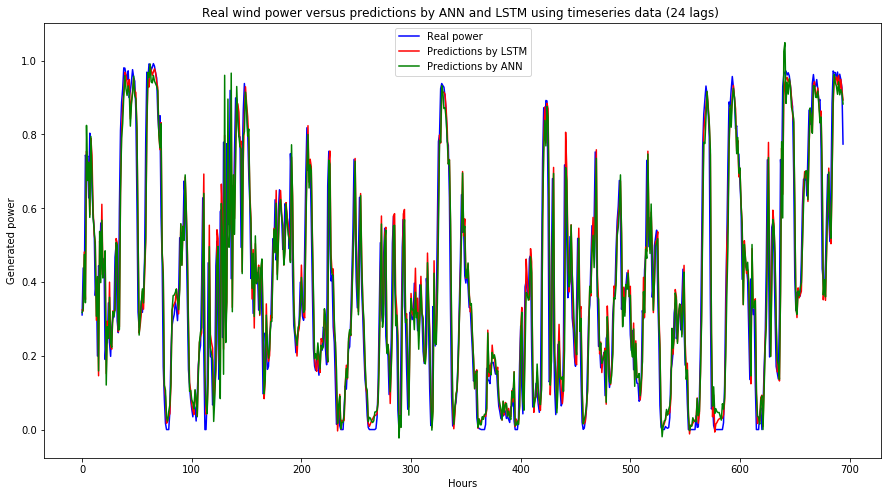

In [70]:
#part 3-comparison 2- 24 lags

fig= plt.figure(figsize=(15,8))
power_changes=fig.add_subplot(1,1,1)
power_changes.set_ylabel('Generated power')
power_changes.set_xlabel('Hours')

power_changes.plot(y_test, color='blue', label='Real power')

power_changes.plot(lstm_pred, color= 'red', label='Predictions by LSTM')
power_changes.plot(ann_pred, color= 'green', label='Predictions by ANN')
power_changes.set_title('Real wind power versus predictions by ANN and LSTM using timeseries data (24 lags) ')
power_changes.legend(loc='best')

In [ ]:
#We save the results with higher accuracy in CSV files
#Most models performed better when the number of lags(input features or predictors) increased from 1 to 24

In [93]:
def create_results(temp,pred):
    
    temp['FORECAST']=pred
    return temp

In [94]:
PATH= '/Users/rituka/Downloads/WindEnergyForecasting-Assignment2/'
file_name= 'ForecastTemplate.csv' 
tempelate_result = pd.read_csv(PATH + file_name)
#Because we reframe time series data to a data matrix with 24 columns, we missed the first 24 hours(first day )of data 
#because they were converted to Null values
tempelate_result_3=tempelate_result[25:]

In [96]:

Forecast_LR=create_results(tempelate_result_3,predictions_lr)
Forecast_LR.to_csv('/Users/rituka/Documents/results/ForecastTemplate3-LR.csv',index=False)

Forecast_svr=create_results(tempelate_result_3,y_svr_rbf)
Forecast_svr.to_csv('/Users/rituka/Documents/results/ForecastTemplate3-SVR.csv',index=False)

Forecast_ann=create_results(tempelate_result_3,ann_pred)
Forecast_ann.to_csv('/Users/rituka/Documents/results/ForecastTemplate3-ANN.csv',index=False)

Forecast_lstm=create_results(tempelate_result_3,lstm_pred)
Forecast_lstm.to_csv('/Users/rituka/Documents/results/ForecastTemplate3-RNN.csv',index=False)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
